# Group : WANG Xi, REN Jiren and NGUYEN Dang Hoang Khang

From : https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17/data

### Data loading

In [1]:
import platform
from pathlib import Path
import pandas as pd

In [2]:
DATA = Path("../HoML/data")
assert DATA.exists()

In [3]:
star_raw_df = pd.read_csv(DATA / "star_classification.csv", low_memory=False)
#star_raw_df

In [4]:
star_df = star_raw_df.dropna()
#star_df

In [5]:
#star_df['class'].value_counts()

In [6]:
#star_df.describe()

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#on n'a pas besoin les id
id_columns = [col for col in star_df.columns if 'id' in col.lower()]
print("what id features", id_columns)
star_df_cleaned = star_df.drop(columns=id_columns)
#print(star_df_cleaned.head())

X = star_df_cleaned.drop(columns=['class'])
y = star_df_cleaned['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#print("X : ", X)
#y is the column with their class
#print("y : ", y)

# 将类别标签编码为数值
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


what id features ['obj_ID', 'run_ID', 'rerun_ID', 'field_ID', 'spec_obj_ID', 'fiber_ID']


In [8]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Liste des modèles
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier()
    #"SVM": SVC()
}

# Entraînement et évaluation
accuracies = {}
for name, model in models.items():
    model.fit(X_train, y_train)  # Entraînement sur données haute dimension
    y_pred = model.predict(X_test)  # Prédictions
    accuracies[name] = accuracy_score(y_test, y_pred)

# Afficher les résultats
for model_name, acc in accuracies.items():
    print(f"{model_name}: {acc:.4f}")

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression: 0.6004
Decision Tree: 0.9665
Random Forest: 0.9792
KNN: 0.7874


### t_SNE

In [9]:
#Use t-SNE to dimensionality reduction
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd

#from sklearn.decomposition import PCA

#pca = PCA(n_components=5)
#X_pca = pca.fit_transform(X)


#perplexity=25, n_iter=250
tsne = TSNE(n_components=2, random_state=42, perplexity=25, n_iter=250)
#X_tsne = tsne.fit_transform(X_pca)
X_tsne = tsne.fit_transform(X)

#X_train_2d = tsne.fit_transform(X_train)
#X_test_2d = tsne.fit_transform(X_test)

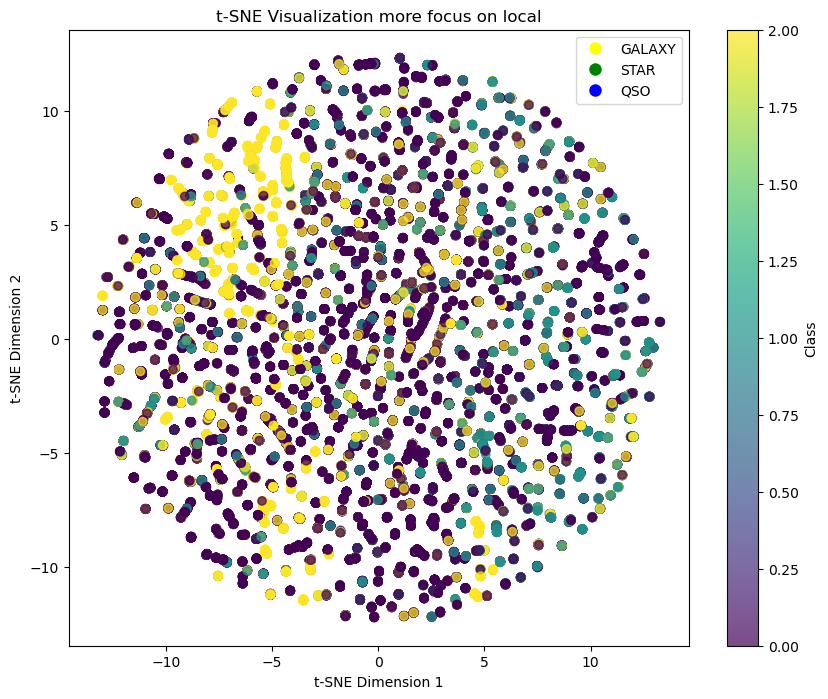

In [9]:
#Visualisation
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_encoded, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label="Class")
plt.title("t-SNE Visualization more focus on local")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='yellow', markersize=10, label='GALAXY'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='STAR'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='QSO')
], loc='upper right')
plt.show()

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Liste des modèles
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier()
    #"SVM": SVC()
}


# Entraînement et évaluation
for name, model in models.items():
    model.fit(X_tsne, y)  # Entraînement sur données haute dimension
    print(f"{name}: {model.score(X_tsne,y):.4f}")


Logistic Regression: 0.5910
Decision Tree: 1.0000
Random Forest: 0.9999
KNN: 0.7579


#perplexity=40, learning_rate=300, n_iter=500
tsne = TSNE(n_components=2, perplexity=40, learning_rate=300, n_iter=500)
X_tsne = tsne.fit_transform(X)

#Visualisation
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_encoded, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label="Class")
plt.title("t-SNE Visualization")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='yellow', markersize=10, label='GALAXY'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='STAR'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='QSO')
], loc='upper right')
plt.show()


### Analysis t_NSE graph:
1. **Point Distribution**:
- The image shows three distinct classes: **Galaxy (yellow)**, **Star (blue)**, and **QSO (turquoise)**. Each point represents a sample of one of these classes.
- The points are distributed relatively evenly across the t-SNE plane, but with some areas of concentration for each class.

2. **Class Structure**:
- The yellow points (Galaxy) are clustered in the central area and occupy a large portion of the space. This could indicate that the galaxies share similar characteristics within the dimensions used.
- The blue (Star) and turquoise (QSO) points are also clearly visible but less concentrated, and seem to blend somewhat with the other classes. This could suggest that stars and QSOs have overlapping features in the t-SNE plane.

3. **Spatial distribution**:
- There appears to be some separation between the **Galaxy** (yellow) and **Star** (blue) classes, with yellow spots concentrated on the left and a blue part on the right. However, the **QSO** (turquoise) show more dispersion, lying between the other classes, suggesting that these objects have more varied or difficult to separate features.

### Conclusion:
- **Data structure**: The data show some separation between classes, but with significant overlap, especially for stars and QSOs. This indicates that these classes may share similar features, or that the data dimensions are not entirely effective in separating these classes.
- **Use of t-SNE**: While t-SNE helps visualize local relationships and clustering, the separation between classes is not perfect, suggesting that the 2D representation does not fully capture the complex distinctions between different classes.
- **Possible Improvement**: It may be necessary to reconsider the features used or explore other dimension reduction techniques to better separate classes, especially stars and QSOs.


In [11]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_tsne, y)
print(rf.score(X_tsne, y))


0.99987


Another solution to find features. 
Visualize the distribution of the feature alpha for each class (Galaxy, Quasar, Star) using 
### kernel density estimation (KDE).
1st feature we tried is 'alpha'


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


# Ensure `y_train` is aligned with `X_train` and accessible
# If y_train is not numeric, ensure it's encoded into 0, 1, 2
idlabel = {0: 'Galaxy', 1: 'QSO', 2: 'Star'}
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)


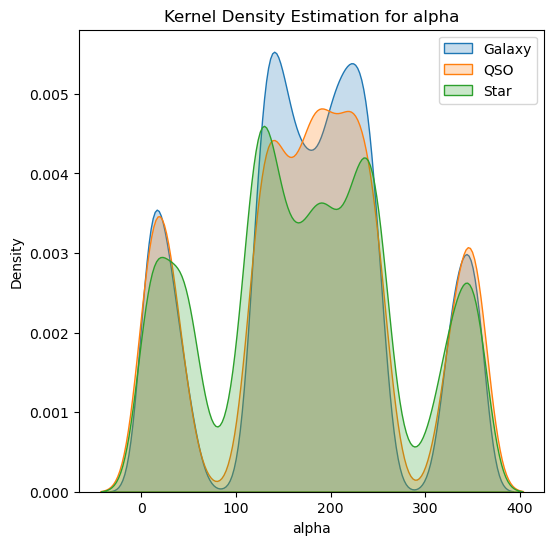

In [24]:
# Feature to plot (e.g., 'alpha')
feature_to_plot = 'alpha'

# Ensure y_train is a numpy array or pandas Series for boolean indexing
plt.figure(figsize=(6, 6))

for class_id, class_name in idlabel.items():
    # Ensure proper boolean indexing
    class_data = X_train[y_train_encoded == class_id][feature_to_plot]
    sns.kdeplot(data=class_data, fill=True, label=class_name)

plt.legend()
plt.title(f'Kernel Density Estimation for {feature_to_plot}')
plt.xlabel(feature_to_plot)
plt.ylabel('Density')
plt.show()

In [25]:
import numpy as np
print(np.unique(y_train_encoded))


[0 1 2]


In [9]:
#print(X_train.columns)

In [11]:
import numpy as np
from scipy.stats import entropy
import seaborn as sns
import matplotlib.pyplot as plt

def kde_difference_kl_fixed_range(feature, X_train, y_train_encoded, classes, x_range=None):
    """
    Calculate the Kullback-Leibler divergence between KDEs of different classes with a fixed x range.
    """
    # Define a fixed x range if not provided
    if x_range is None:
        feature_min = X_train[feature].min()
        feature_max = X_train[feature].max()
        x_range = np.linspace(feature_min, feature_max, 1000)  # Common x range

    # Compute KDE curves for each class
    kde_curves = {}
    for class_id in range(len(classes)):
        class_data = X_train[y_train_encoded == class_id][feature]
        kde = sns.kdeplot(class_data, fill=False, warn_singular=False)
        y_values = np.interp(x_range, kde.get_lines()[0].get_xdata(), kde.get_lines()[0].get_ydata())
        kde_curves[class_id] = y_values
        plt.close()  # Prevent plotting

    # Compute KL divergence between classes
    kl_results = {}
    for i in range(len(classes)):
        for j in range(i + 1, len(classes)):
            p = kde_curves[i]
            q = kde_curves[j]
            kl_divergence = entropy(p, q)  # KL divergence
            kl_results[f'{classes[i]} vs {classes[j]}'] = kl_divergence

    return kl_results

# Example usage
x_range = np.linspace(X_train['alpha'].min(), X_train['alpha'].max(), 1000)
kl_alpha = kde_difference_kl_fixed_range('alpha', X_train, y_train_encoded, ['Galaxy', 'QSO', 'Star'], x_range=x_range)
print(kl_alpha)

{'Galaxy vs QSO': 0.013203316593185025, 'Galaxy vs Star': 0.08674902565976765, 'QSO vs Star': 0.05279633896170786}


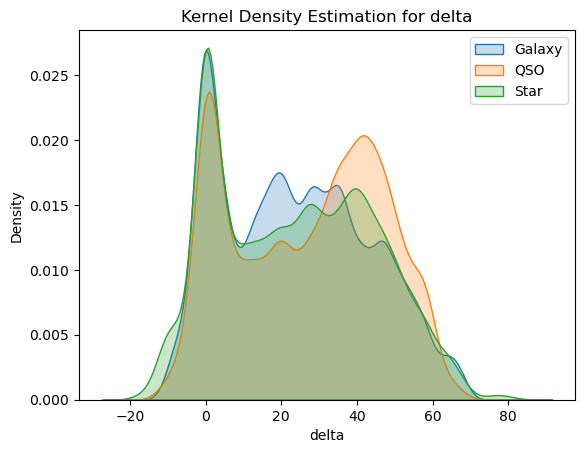

In [12]:
feature_to_plot = 'delta'
for class_id, class_name in idlabel.items():
    # Ensure proper boolean indexing
    class_data = X_train[y_train_encoded == class_id][feature_to_plot]
    sns.kdeplot(data=class_data, fill=True, label=class_name)
plt.title(f'Kernel Density Estimation for {feature_to_plot}')
plt.xlabel(feature_to_plot)
plt.ylabel('Density')
plt.legend();

In [13]:
x_range = np.linspace(X_train['delta'].min(), X_train['delta'].max(), 1000)
kl_delta = kde_difference_kl_fixed_range('delta', X_train, y_train_encoded, ['Galaxy', 'QSO', 'Star'], x_range=x_range)
print(kl_delta)

{'Galaxy vs QSO': 0.042050489793355184, 'Galaxy vs Star': 0.021362774281809913, 'QSO vs Star': 0.034843544668322554}


In [14]:
#sns.jointplot(data=X_train, x='alpha', y='delta', hue=y_train, s=50, alpha=0.5, height=10, ratio=3);

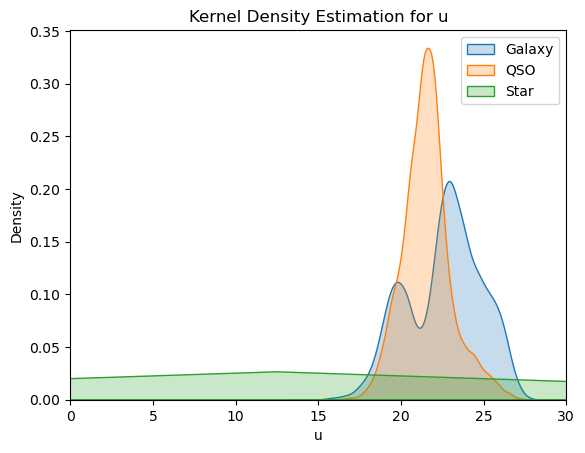

In [15]:
feature_to_plot = 'u'

for class_id, class_name in idlabel.items():
    # Ensure proper boolean indexing
    class_data = X_train[y_train_encoded == class_id][feature_to_plot]
    sns.kdeplot(data=class_data, fill=True, label=class_name)
plt.title(f'Kernel Density Estimation for {feature_to_plot}')
plt.xlim(0, 30)
plt.xlabel(feature_to_plot)
plt.ylabel('Density')
plt.legend();

In [16]:
x_range = np.linspace(X_train['u'].min(), X_train['u'].max(), 1000)
kl_density = kde_difference_kl_fixed_range('u', X_train, y_train_encoded, ['Galaxy', 'QSO', 'Star'], x_range=x_range)
print(kl_density)

{'Galaxy vs QSO': 0.005261537137100812, 'Galaxy vs Star': inf, 'QSO vs Star': inf}


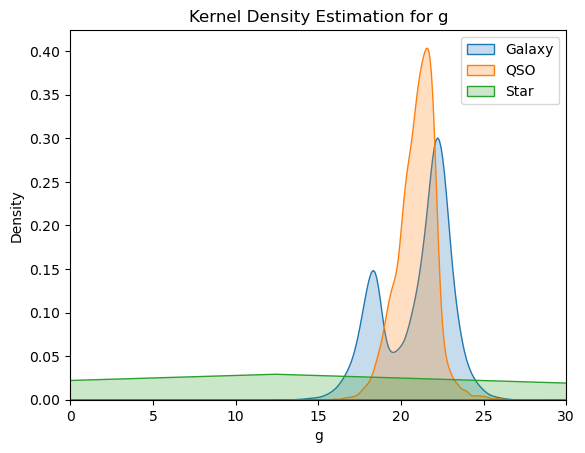

In [17]:
feature_to_plot = 'g'
for class_id, class_name in idlabel.items():
    # Ensure proper boolean indexing
    class_data = X_train[y_train_encoded == class_id][feature_to_plot]
    sns.kdeplot(data=class_data, fill=True, label=class_name)
plt.title(f'Kernel Density Estimation for {feature_to_plot}')
plt.xlim(0, 30)
plt.xlabel(feature_to_plot)
plt.ylabel('Density')
plt.legend();

In [18]:
x_range = np.linspace(X_train['g'].min(), X_train['g'].max(), 1000)
kl_g = kde_difference_kl_fixed_range('g', X_train, y_train_encoded, ['Galaxy', 'QSO', 'Star'], x_range=x_range)
print(kl_g)

{'Galaxy vs QSO': 0.0013401668898584834, 'Galaxy vs Star': inf, 'QSO vs Star': inf}


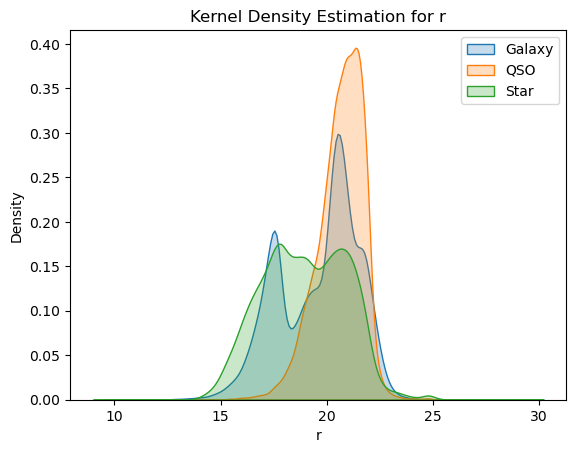

In [19]:
feature_to_plot = 'r'
for class_id, class_name in idlabel.items():
    # Ensure proper boolean indexing
    class_data = X_train[y_train_encoded == class_id][feature_to_plot]
    sns.kdeplot(data=class_data, fill=True, label=class_name)
plt.title(f'Kernel Density Estimation for {feature_to_plot}')
plt.xlabel(feature_to_plot)
plt.ylabel('Density')
plt.legend();

In [20]:
x_range = np.linspace(X_train['r'].min(), X_train['r'].max(), 1000)
kl_r = kde_difference_kl_fixed_range('r', X_train, y_train_encoded, ['Galaxy', 'QSO', 'Star'], x_range=x_range)
print(kl_r)

{'Galaxy vs QSO': 0.5790612680096999, 'Galaxy vs Star': 0.10566055125851723, 'QSO vs Star': 0.5481252532278313}


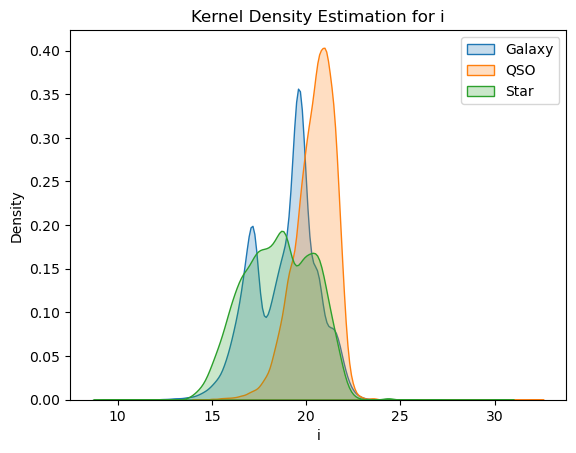

In [21]:
feature_to_plot = 'i'
for class_id, class_name in idlabel.items():
    # Ensure proper boolean indexing
    class_data = X_train[y_train_encoded == class_id][feature_to_plot]
    sns.kdeplot(data=class_data, fill=True, label=class_name)
plt.title(f'Kernel Density Estimation for {feature_to_plot}')
plt.xlabel(feature_to_plot)
plt.ylabel('Density')
plt.legend();

In [22]:
x_range = np.linspace(X_train['i'].min(), X_train['i'].max(), 1000)
kl_i = kde_difference_kl_fixed_range('i', X_train, y_train_encoded, ['Galaxy', 'QSO', 'Star'], x_range=x_range)
print(kl_i)

{'Galaxy vs QSO': 0.8764733170563836, 'Galaxy vs Star': 0.09476657101144718, 'QSO vs Star': 0.6587264991266821}


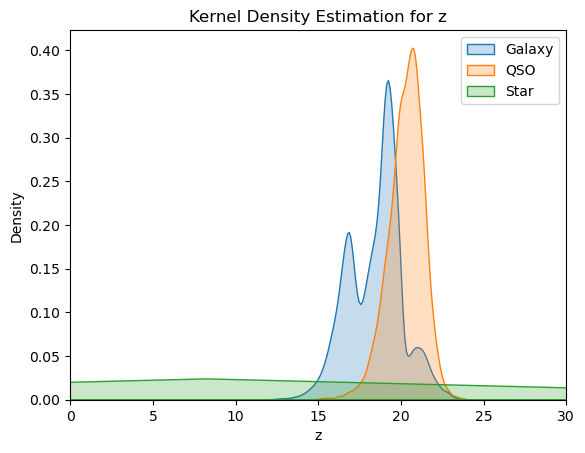

In [23]:
feature_to_plot = 'z'
for class_id, class_name in idlabel.items():
    # Ensure proper boolean indexing
    class_data = X_train[y_train_encoded == class_id][feature_to_plot]
    sns.kdeplot(data=class_data, fill=True, label=class_name)
plt.title(f'Kernel Density Estimation for {feature_to_plot}')
plt.xlim(0, 30)
plt.xlabel(feature_to_plot)
plt.ylabel('Density')
plt.legend();

In [24]:
x_range = np.linspace(X_train['z'].min(), X_train['z'].max(), 1000)
kl_z = kde_difference_kl_fixed_range('z', X_train, y_train_encoded, ['Galaxy', 'QSO', 'Star'], x_range=x_range)
print(kl_z)

{'Galaxy vs QSO': 0.005077123164996341, 'Galaxy vs Star': inf, 'QSO vs Star': inf}


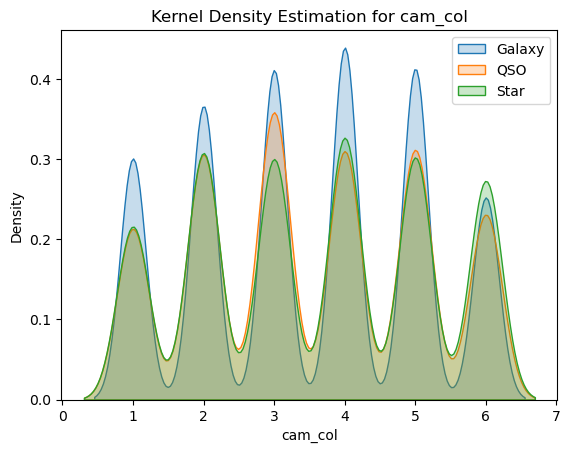

In [25]:
feature_to_plot = 'cam_col'
for class_id, class_name in idlabel.items():
    class_data = X_train[y_train_encoded == class_id][feature_to_plot]
    sns.kdeplot(data=class_data, fill=True, label=class_name)
plt.title(f'Kernel Density Estimation for {feature_to_plot}')
plt.xlabel(feature_to_plot)
plt.ylabel('Density')
plt.legend();

In [26]:
x_range = np.linspace(X_train['cam_col'].min(), X_train['cam_col'].max(), 1000)
kl_cam_col = kde_difference_kl_fixed_range('cam_col', X_train, y_train_encoded, ['Galaxy', 'QSO', 'Star'], x_range=x_range)
print(kl_cam_col)

{'Galaxy vs QSO': 0.04611751070538961, 'Galaxy vs Star': 0.0486214127598066, 'QSO vs Star': 0.0046046482815777535}


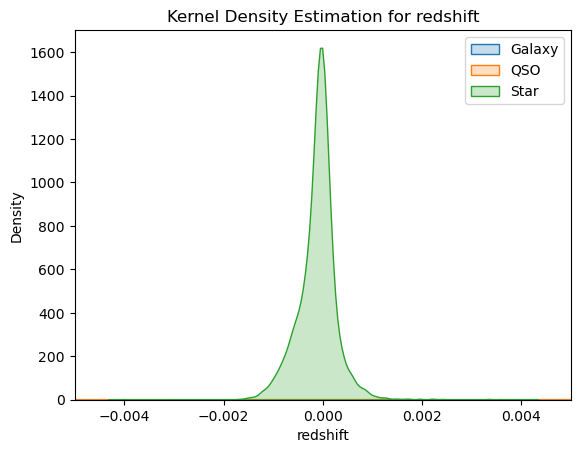

In [27]:
feature_to_plot = 'redshift'
for class_id, class_name in idlabel.items():
    class_data = X_train[y_train_encoded == class_id][feature_to_plot]
    sns.kdeplot(data=class_data, fill=True, label=class_name)
plt.title(f'Kernel Density Estimation for {feature_to_plot}')
plt.xlim(-0.005, 0.005)
plt.xlabel(feature_to_plot)
plt.ylabel('Density')
plt.legend();

In [28]:
x_range = np.linspace(X_train['redshift'].min(), X_train['redshift'].max(), 1000)
kl_redshift = kde_difference_kl_fixed_range('redshift', X_train, y_train_encoded, ['Galaxy', 'QSO', 'Star'], x_range=x_range)
print(kl_redshift)

{'Galaxy vs QSO': 2.0003189590570134, 'Galaxy vs Star': 2.1225323052990763, 'QSO vs Star': 0.8781510068358042}


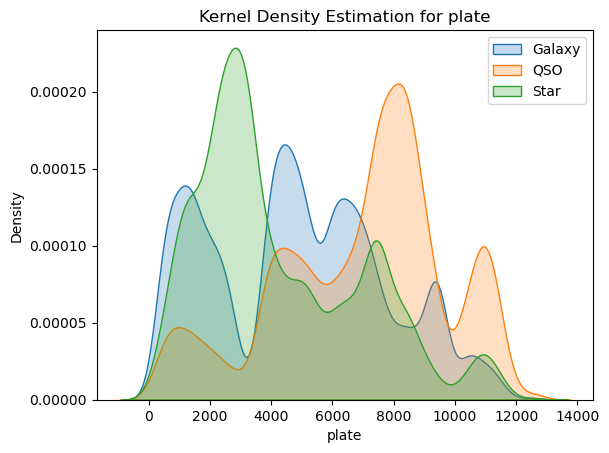

In [29]:
feature_to_plot = 'plate'
for class_id, class_name in idlabel.items():
    class_data = X_train[y_train_encoded == class_id][feature_to_plot]
    sns.kdeplot(data=class_data, fill=True, label=class_name)
plt.title(f'Kernel Density Estimation for {feature_to_plot}')
plt.xlabel(feature_to_plot)
plt.ylabel('Density')
plt.legend();

In [30]:
x_range = np.linspace(X_train['plate'].min(), X_train['plate'].max(), 1000)
kl_plate = kde_difference_kl_fixed_range('plate', X_train, y_train_encoded, ['Galaxy', 'QSO', 'Star'], x_range=x_range)
print(kl_plate)

{'Galaxy vs QSO': 0.32194537178313126, 'Galaxy vs Star': 0.2430981594309738, 'QSO vs Star': 0.5258086026237476}


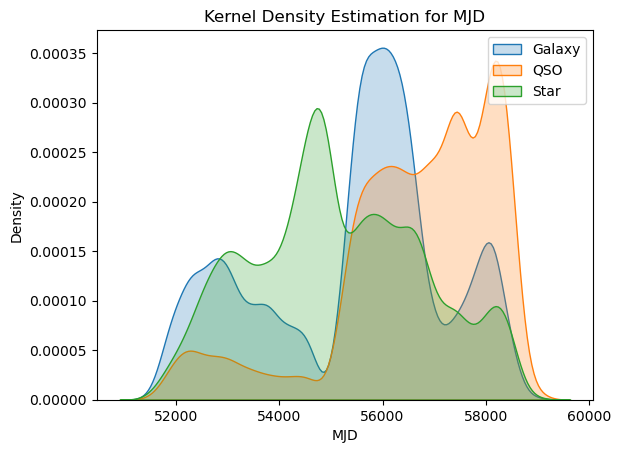

In [31]:
feature_to_plot = 'MJD'
for class_id, class_name in idlabel.items():
    class_data = X_train[y_train_encoded == class_id][feature_to_plot]
    sns.kdeplot(data=class_data, fill=True, label=class_name)
plt.title(f'Kernel Density Estimation for {feature_to_plot}')
plt.xlabel(feature_to_plot)
plt.ylabel('Density')
plt.legend();

In [32]:
x_range = np.linspace(X_train['MJD'].min(), X_train['MJD'].max(), 1000)
kl_MJD = kde_difference_kl_fixed_range('MJD', X_train, y_train_encoded, ['Galaxy', 'QSO', 'Star'], x_range=x_range)
print(kl_MJD)

{'Galaxy vs QSO': 0.2977030930085085, 'Galaxy vs Star': 0.21027960074198315, 'QSO vs Star': 0.5254078500806975}


In [36]:
#print(X_train.columns)
kl_results_all = {}

# Calculate KL divergences for each feature
for feature in X_train.columns:
    x_range = np.linspace(X_train[feature].min(), X_train[feature].max(), 1000)
    kl_results_all[feature] = kde_difference_kl_fixed_range(feature, X_train, y_train_encoded, ['Galaxy', 'QSO', 'Star'], x_range)

# Convert the results into a DataFrame
kl_table = pd.DataFrame(kl_results_all).T
kl_table.columns = [f'{pair}' for pair in kl_table.columns]
kl_table.index.name = 'Feature'

# Display the table
print(kl_table)

          Galaxy vs QSO  Galaxy vs Star  QSO vs Star
Feature                                             
alpha          0.013203        0.086749     0.052796
delta          0.042050        0.021363     0.034844
u              0.005262             inf          inf
g              0.001340             inf          inf
r              0.579061        0.105661     0.548125
i              0.876473        0.094767     0.658726
z              0.005077             inf          inf
cam_col        0.046118        0.048621     0.004605
redshift       2.000319        2.122532     0.878151
plate          0.321945        0.243098     0.525809
MJD            0.297703        0.210280     0.525408


The Kernel Density Estimation of alpha, delta and cam_col are too coincide, there are a overlipping. So i decided to rejete them.
Now we have u, g, r, i, z, redshift, plate and MJD.

Then after calculate the Kullback-Leibler divergence between KDEs of different classes with a fixed x range.
I want to rejecte z, because it is very similar than u. And g because it is very low for the diference between Galaxy and QSO, qnd it still similar with u and z. 

Now we have u, r, i, redshift, plate and MJD.

In [11]:
# Liste des colonnes à conserver
features_to_keep = ['u', 'r', 'i', 'redshift', 'plate', 'MJD']

# Supprimer les autres colonnes de X_train
X_train_filtered = X_train[features_to_keep]
X_test_filtered = X_test[features_to_keep]

label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)

# Vérifier le résultat
print("Colonnes restantes :")
print(X_train_filtered.columns)

print("Dimensions de X_train :", X_train_filtered.shape)
print("Dimensions de y_train :", y_train_encoded.shape)
print("Dimensions de X_test :", X_test_filtered.shape)
print("Dimensions de y_test :", y_test_encoded.shape)

Colonnes restantes :
Index(['u', 'r', 'i', 'redshift', 'plate', 'MJD'], dtype='object')
Dimensions de X_train : (80000, 6)
Dimensions de y_train : (80000,)
Dimensions de X_test : (20000, 6)
Dimensions de y_test : (20000,)


## Training

In [17]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics
from sklearn import preprocessing
import numpy as np

#logistic regression
from sklearn.linear_model import LogisticRegression
#decision tree
from sklearn.tree import DecisionTreeClassifier
#random forest
from sklearn.ensemble import RandomForestClassifier
#k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
#Support Vector Machines (SVM)
from sklearn.svm import SVC


In [18]:
#logistic regression
lr_model = LogisticRegression()
lr_model.fit(X_train_filtered, y_train_encoded)
lr_predict = lr_model.predict(X_test_filtered)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
#decision tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_filtered, y_train_encoded)
dt_predict = dt_model.predict(X_test_filtered)


In [20]:
#Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train_filtered, y_train_encoded)
rf_predict = rf_model.predict(X_test_filtered)


In [21]:
#k-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_filtered, y_train_encoded)
knn_predict = knn_model.predict(X_test_filtered)


In [ ]:
#SVM
svm_model = SVC()
svm_model.fit(X_train_filtered, y_train_encoded)
svm_predict = svm_model.predict(X_test_filtered)

In [ ]:
#print(np.unique(y_test_encoded))
#print(np.unique(lr_predict)) 

In [ ]:

def confusion_matrix(y_pred, y_test):
    TN,FP,FN,TP=np.zeros(4)
    for i, y in enumerate(y_test):
        if y == 1 and y_pred[i] == 1:
            TP = TP + 1
        elif y == 1 and y_pred[i] == 0:
            FN = FN + 1
        elif y == 0 and y_pred[i] == 0:
            TN = TN + 1
        elif y == 0 and y_pred[i] == 1:
            FP = FP + 1
    return TN,FP,FN,TP
    

def accuracy(y_pred, y_test):
    TN, FP, FN, TP  = confusion_matrix(y_pred,y_test)
    ACC = (TP + TN) / (TP + TN + FP + FN)
    return ACC

predictions = [lr_predict, dt_predict, rf_predict, knn_predict,  svm_predict]
accuracy_of_predictions = [accuracy(y_pred, y_test_encoded) for y_pred in predictions]
print(f"""Accuracy: \n logistic_regression_predictions: {accuracy_of_predictions[0]}
 decision_tree_predictions: {accuracy_of_predictions[1]}
 random_forest_predictions: {accuracy_of_predictions[2]}
 knn_predicitons: {accuracy_of_predictions[3]}
 svm_predictions: {accuracy_of_predictions[4]}
""")

### Errors analysis

In [ ]:
from sklearn.model_selection import GridSearchCV

# Définir les hyperparamètres à tester
param_grid = {
    "n_estimators": [50, 100],
    "max_depth": [None, 10],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}


# Configurer GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    scoring="accuracy",
    cv=5,
    n_jobs=1  # Limit to 2 parallel jobs
)

from sklearn.utils import resample

rX_train_filtered, ry_train_encoded = resample(
    X_train_filtered, y_train_encoded, n_samples=5000, random_state=42
)

# Effectuer la recherche
grid_search.fit(rX_train_filtered, ry_train_encoded)

# Meilleur modèle
best_rf_model = grid_search.best_estimator_

# Importances des caractéristiques
feature_importances = best_rf_model.feature_importances_


# Afficher les importances
for feature, importance in zip(features_to_keep, feature_importances):
    print(f"{feature}: {importance:.4f}")

'''
feature_importances = (
    grid_search.best_estimator_.feature_importances_
)
'''

Redshift is the most important feature, and MJD the less significant feature about random foreast.

Other model possible try GridResearch : Arbre de décision (DecisionTreeClassifier) and Gradient Boosting (GradientBoostingClassifier).

In [24]:
param_grid = {
    "criterion": ["gini", "entropy"],  # DecisionTree splitting criteria
    "max_depth": [None, 10, 20],       # Maximum depth of the tree
    "min_samples_split": [2, 5],       # Minimum samples required to split a node
    "min_samples_leaf": [1, 2]         # Minimum samples required at a leaf node
}

grid_search = GridSearchCV(
    estimator=dt_model,
    param_grid=param_grid,
    scoring="accuracy",
    cv=5,
    n_jobs=1  # Limit to 1 parallel jobs
)

grid_search.fit(rX_train_filtered, ry_train_encoded)

best_dt_model = grid_search.best_estimator_

feature_importances = best_dt_model.feature_importances_

for feature, importance in zip(features_to_keep, feature_importances):
    print(f"{feature}: {importance:.4f}")

u: 0.0574
r: 0.0215
i: 0.0104
redshift: 0.8934
plate: 0.0132
MJD: 0.0040


MJD's importance still very low, we can rejecte MJD. Boosting take too much time and finished never, so we put it in the comment.

### Fine-tuning

In [ ]:
# Liste des colonnes à conserver
features_to_keep = ['u', 'r', 'i', 'redshift', 'plate']

# Supprimer les autres colonnes de X_train
X_train_filtered = X_train[features_to_keep]
X_test_filtered = X_test[features_to_keep]

label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)

# Vérifier le résultat
print("Colonnes restantes :")
print(X_train_filtered.columns)

print("Dimensions de X_train :", X_train_filtered.shape)
print("Dimensions de y_train :", y_train_encoded.shape)
print("Dimensions de X_test :", X_test_filtered.shape)
print("Dimensions de y_test :", y_test_encoded.shape)


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics
from sklearn import preprocessing

#logistic regression
from sklearn.linear_model import LogisticRegression
#decision tree
from sklearn.tree import DecisionTreeClassifier
#random forest
from sklearn.ensemble import RandomForestClassifier
#k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
#Support Vector Machines (SVM)
from sklearn.svm import SVC


In [ ]:
#logistic regression
lr_model = LogisticRegression()
lr_model.fit(X_train_filtered, y_train_encoded)
lr_predict = lr_model.predict(X_test_filtered)

In [ ]:
#decision tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_filtered, y_train_encoded)
dt_predict = dt_model.predict(X_test_filtered)

In [ ]:
#Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train_filtered, y_train_encoded)
rf_predict = rf_model.predict(X_test_filtered)

In [ ]:
#k-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_filtered, y_train_encoded)
knn_predict = knn_model.predict(X_test_filtered)

In [ ]:
#SVM
from sklearn.svm import LinearSVC
svm_model = LinearSVC()
svm_model.fit(X_train_filtered, y_train_encoded)
svm_predict = svm_model.predict(X_test_filtered)

In [ ]:
predictions = [lr_predict, dt_predict, rf_predict, knn_predict,  svm_predict]
accuracy_of_predictions = [accuracy(y_pred, y_test_encoded) for y_pred in predictions]
print(f"""Accuracy: \n logistic_regression_predictions: {accuracy_of_predictions[0]}
 decision_tree_predictions: {accuracy_of_predictions[1]}
 random_forest_predictions: {accuracy_of_predictions[2]}
 knn_predicitons: {accuracy_of_predictions[3]}
 svm_predictions: {accuracy_of_predictions[4]}
""")